# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World


## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [64]:
import numpy as np
state_position = "findcorner"
actions = ["north", "east", "west", "south", "suck"]
directions=["north","east","west","south"]
notNorth=["east","west","south"]
notEast=["north","west","south"]
notWest=["north","east","south"]
notSouth=["north","east","west"]
notNorthOrEast=["west","south"]
notNorthOrWest=["east","south"]
notSouthOrEast=["north","west"]
notSouthOrWest=["north","east"]
def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [65]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'west'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a performance measure which is here the number of cleaned squares (since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room as required in the PEAS description above). The energy budget of the agent is specified as `max_steps`. 

In [66]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0
    
    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action) 
        
        if (action == "suck"): 
            num_cleaned = num_cleaned + 1
        
    return num_cleaned
        


Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [67]:
simple_environment(simple_randomized_agent,5)

step 0 - action: north
step 1 - action: west
step 2 - action: west
step 3 - action: north
step 4 - action: suck


1

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. Use the same environmnt for all your agent implementations in the tasks below.

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [71]:

def simple_environment(agent,size, verbose = True):
    global state_position
    state_position="findcorner"
    arr= np.zeros((size,size),int)
    rows=arr.shape[0]
    cols=arr.shape[1]
    rng = np.random.default_rng()
    p=.2
    for x in range(0,rows):
        for y in range(0, cols):
            randomNum=rng.random()
            if randomNum<.2:
                arr[x,y]=1
    if(verbose):print(arr)
    num_cleaned = 0
    x=0
    y=0
    i=0
    while(np.any(arr)):

        #set bumpers based on position
        if(x==0 and y==0):
            bumpers = {"north" : True, "south" : False, "west" : True, "east" : False}
        elif(x==0 and (y>0 and y<size-1)):
            bumpers = {"north" : True, "south" : False, "west" : False, "east" : False}
        elif(x==0 and y==size-1):
            bumpers = {"north" : True, "south" : False, "west" : False, "east" : True}
        elif(y==size-1 and (x>0 and x<size-1)):
            bumpers = {"north" : False, "south" : False, "west" : False, "east" : True}
        elif(x==size-1 and y==size-1):
            bumpers = {"north" : False, "south" : True, "west" : False, "east" : True}
        elif(x==size-1 and (y>0 and y<size-1)):
            bumpers = {"north" : False, "south" : True, "west" : False, "east" : False}
        elif(x==size-1 and y==0):
            bumpers = {"north" : False, "south" : True, "west" : True, "east" : False}
        elif(y==0 and (x>0 and x<size-1)):
            bumpers = {"north" : False, "south" : False, "west" : True, "east" : False}
        else:
            bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        #set dirty
        if arr[x,y]==1:
            dirty = True
        else:
            dirty = False

        action = agent(bumpers, dirty)
        if (verbose):
            print(x,",",y)
            print("step", i , "- action:", action)


        if(action=="none"):
            print("Room is clean!")
            state_position="findcorner"
            return
        #suck
        if (action == "suck"):
            num_cleaned = num_cleaned + 1
            #if the spot is actually dirty, remove the dirt
            if(arr[x,y]==1):
                if(verbose):("Successfully sucked")
                arr[x,y]=0

        #if action is north
        elif(action=="north"):
            if(x>0):
                x-=1
            elif(verbose):
                print('You Hit A Bumper')
        #if action is east
        elif(action=="east"):
            if(y<size-1):
                y+=1
            else:
                if(verbose):print('You Hit A Bumper')
        #if action is south
        elif(action=="south"):
            if(x<size-1):
                x+=1
            else:
                if(verbose):print('You Hit A Bumper')
        #if action is west
        elif(action=="west"):
            if(y>0):
                y-=1
            else:
                if(verbose):print('You Hit A Bumper')
        i=i+1
        if(verbose):print(arr)

    if(verbose):print(arr)


    return i
simple_environment(simple_randomized_agent,5,False)

117

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function.

In [70]:

def reflex_agent(bumpers, dirty):
    #react to dirt with suck
    if(dirty==True):
        return "suck"
    #react to being against a bumper by moving in reverse
    if(bumpers["north"]==True and bumpers["west"]==True):
        return np.random.choice(notNorthOrWest)
    elif(bumpers["north"]==True and bumpers["east"]==True):
        return np.random.choice(notNorthOrEast)
    elif(bumpers["south"]==True and bumpers["east"]==True):
        return np.random.choice(notSouthOrEast)
    elif(bumpers["south"]==True and bumpers["west"]==True):
        return np.random.choice(notSouthOrWest)
    elif(bumpers["south"]==True):
        return np.random.choice(notSouth)
    elif(bumpers["north"]==True):
        return np.random.choice(notNorth)
    elif(bumpers["west"]==True):
        return np.random.choice(notWest)
    elif(bumpers["east"]==True):
        return np.random.choice(notEast)
    #if not dirty and not against a bumper, then pick a random direction that is not suck
    return np.random.choice(directions)
simple_environment(reflex_agent,100,False)

288488

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/store_agent_state_information.ipynb))

In [ ]:
# This robots model-based reflex agent will travel to the northwest corner of the room, and then navigate in a snake like motion. First traveling to the northeast corner
# moving south one row and traveling to the west, then once it reaches that wall it will move south one row and then move west and so forth. It will also check if each
# square is dirty before moving.

In [ ]:
# Your code goes here
def model_based_agent(bumpers,dirty):
    global state_position
    if(state_position=="findcorner"):
        if(bumpers["north"]==False):
            print(bumpers["north"])
            return "north"
        if(bumpers["west"]==False):
            return "west"
        #if vacuum is in the corner then begin path
        if(bumpers["west"]==True and bumpers["north"]==True):
            state_position="right"

    if(state_position=="right"):
        if(dirty):
            return "suck"
        if(bumpers["east"]==False):
            return "east"
        if(bumpers["east"]==True):
            if(bumpers["south"]==True):
                state_position="DONE"
                return "none"
            state_position="left"
            return "south"
    if(state_position=="left"):
        if(dirty):
            return "suck"
        if(bumpers["west"]==False):
            return "west"
        if(bumpers["west"]==True):
            if(bumpers["south"]==True):
                state_position="DONE"
                return "none"
            state_position="right"
            return "south"

simple_environment(model_based_agent, 5)


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents. 
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/Python_Code_Examples/charts_and_tables.ipynb))

In [ ]:
#It is easier to test one agent at a time so you do not have to wait as long. To do this, comment out the agents you do not currently want to test.
#This code tests arrays of size n=5, n=10, and n=100. Each size will be tested 100 times. The average number of steps taken for each size is in the chart in the next section.

#SIMPLE RANDOMIZED AGENT
# First test all simple agents first and get total number of steps
simple5=0
simple10=0
simple100=0
for x in range(100):
    simple5 += simple_environment(simple_randomized_agent,5,False)
    simple10 += simple_environment(simple_randomized_agent,10,False)
    simple100 += simple_environment(simple_randomized_agent,100,False)
    print(x,"%")
#divide by 100 to get the average number of steps
print(simple5/100)
print(simple10/100)
print(simple100/100)

#REFLEX AGENT
#then test all reflex agents and get total number of steps
reflex5=0
reflex10=0
reflex100=0
for x in range(100):
    reflex5 += simple_environment(reflex_agent,5,False)
    reflex10 += simple_environment(reflex_agent,10,False)
    reflex100 += simple_environment(reflex_agent,100,False)
    print(x,"%")
#then test all reflex agents and get total number of steps

print(reflex5/100)
print(reflex10/100)
print(reflex100/100)

#MODEL BASED AGENT
# then test model based agents and get total number of steps
model5=0
model10=0
model100=0
for x in range(100):
    model5 += simple_environment(model_based_agent,5,False)
    model10 += simple_environment(model_based_agent,10,False)
    model100 += simple_environment(model_based_agent,100,False)
    print(x,"%")
#then test all reflex agents and get total number of steps
print(model5/100)
print(model10/100)
print(model100/100)


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | 454.94           | 102.67              | 25.92                    |
| 10x10   | 3069.3           | 857.89              | 114.34                   |
| 100x100 | 871221.26        | 347928.62           | 12001.07                 |

Add charts to compare the performance of the different agents.

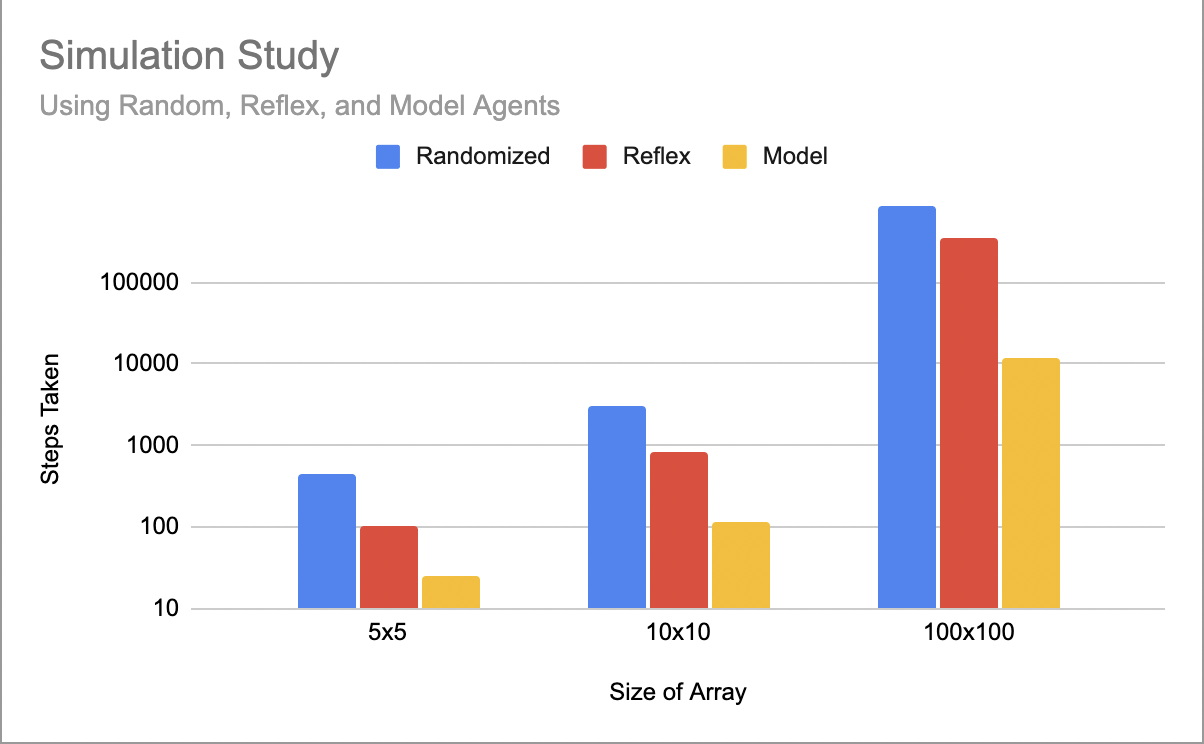

In [72]:
# Your graphs and discussion of the results goes here
from IPython import display
display.Image("./Chart.png")

## Task 5: Robustness of the agent implementations [10 Points] 

Describe how your agent implementations will perform 

* if it is put into a rectangular room with unknown size, 
* if the cleaning area can have an iregular shape (e.g., a hallway connecting two rooms), or 
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

In [ ]:
# If it is put into a rectangular room with unknown size
# - The randomized agent would perform relatively similar, however if the rectangle is very disproportionate it will struggle to get to the edges of the rectangle as its movements
# are completely random. The unknown size would not affect this agent.
# - The reflex agent would perform similar to the random agent. It's performance with a rectangle would be similar to the square, except in cases of very disproportionate rectangles.
# As with the completely random agent, the unknown size would not affect this agent
# - The model-based agent will work well with a rectangular room with unknown size. The algorithm used is not based on a fixed size or shape. The number of steps taken is based on the total number
# of squares, not based on the shape of the room.
# - The model-based agent is the best choice for rectangular rooms of unknown size.

# If the cleaning area has an irregular shape
# - The completely randomized agent would struggle quite significantly to ge through a hallway. Since it's moves are completely random, there is no guarantee it would ever find its way to the other
# side of the hallway. This would be a very inefficient agent for a room of irregular shape.
# - The reflex agent will struggle similarly to the completely randomized agent. It will still work faster, but again it is completely up to chance as to how efficiently it could make it through a
# hallway. Since the movements of the random and reflex agent are still random, there could be some instances where the random agent works better than the reflex if it manages to get through the
# hallway.
# - The model-based agent will not work with irregularly shaped rooms. It is implemented to work with rectangles and squares only. Since it works from the top down, it will not be able to clean
# a room that requires navigating through a hallway, because once it goes down a row, it currently does not have the ability to move back up if it needs to. It will still partially clean the room
# very efficiently.
# - Overall, since the model-based agent will fail on most irregularly shaped rooms, the reflex agent is the best choice of the 3 current agents.

#If the room has obstacles
# - The randomized agent would not be affected by obstacles.
# - The reflex agent would be more efficient than the randomized agent as it would react to the obstacles and move in a different direction.
# - The model-based agent would again not work in a room that contains obstacles. Since it relies on bumpers to detect walls, when it runs into a bumper it will react as if it is next to a wall,
# which would leave the part of the room that is on the other side of the obstacle uncleaned.
# - Overall, the reflex agent would work the best since it is at a minimum guaranteed to finish, whereas the model-based agent would fail in most cases.




## Graduate student advanced task: Obstacles [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

1. Change your simulation environment tor run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Observe how this changes the performance of the three implementations.

2. Describe what would need to be done to perform better with obstacles. Add code if you can. 

In [ ]:
# Your code and discussion goes here

## More advanced implementation tasks

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actualy depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currebntly clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code